# Introduction to Machine Learning

## Supervised Machine Learning

There are 2 main models for approcating this -
- Regression
- Classification

## Linear Regression Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# these are some functions which help in plotting
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [3]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

--2025-07-31 22:39:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60056 (59K) [binary/octet-stream]
Saving to: ‘boston_housing_clean.pickle’

boston_housing_clea 100%[===================>]  58.65K   174KB/s    in 0.3s    

2025-07-31 22:39:49 (174 KB/s) - ‘boston_housing_clean.pickle’ saved [60056/60056]



In [4]:
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']

In [5]:
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
boston_description

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

## Determining Normality
If the target variable is normally distributed, it often leads to better predictions.

If the target is not normally distributed, we can apply transforms to make it normally distributed.

<b>How to tell if the target variable is normally distributed??</b>
- Statistical Approach
- Graphical Approach

<Axes: >

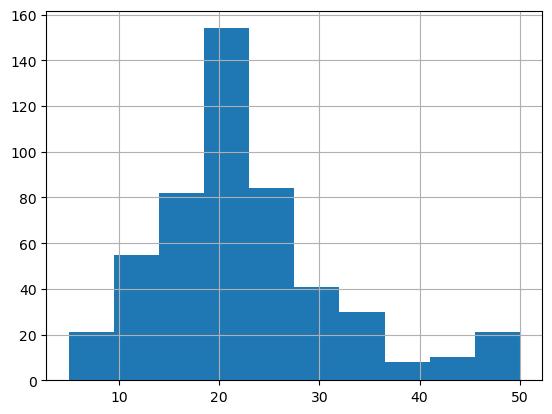

In [7]:
boston_data.MEDV.hist()

### Using a Statistical Model

- Baysian Approach (we accept that it is normally distributed if p-value is high)

In [8]:
from scipy.stats.mstats import normaltest

print(normaltest(boston_data.MEDV.values))

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))


Since the p-value is very low ==> we can infere that distribution is not Normally Distributed.

### Applying Distributions to make it more normally distributed.

1. Log Transformation
2. Square Root Transformation
3. Box Cox Transformation

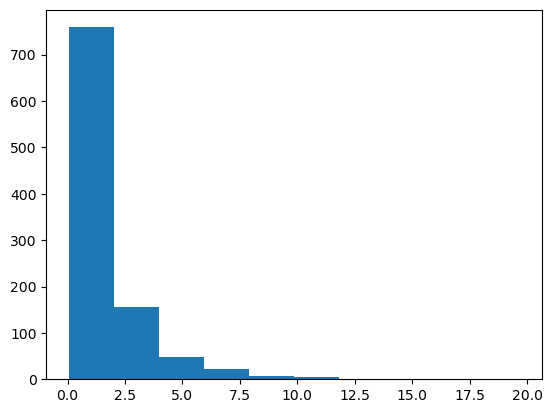

In [9]:
# this is the function we defined earlier
data = plot_exponential_data()

(array([  8.,  33.,  83., 182., 215., 217., 153.,  74.,  31.,   4.]),
 array([-2.84528637, -2.26277091, -1.68025545, -1.09773998, -0.51522452,
         0.06729094,  0.6498064 ,  1.23232187,  1.81483733,  2.39735279,
         2.97986826]),
 <BarContainer object of 10 artists>)

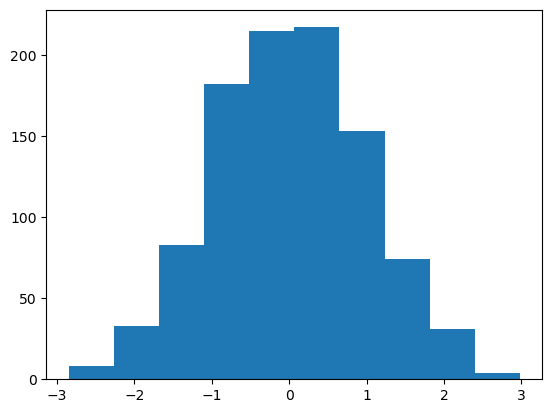

In [10]:
# now applying the log transform to this data.
plt.hist(np.log(data))

<b>Applying data to the Boston Dataset</b>

In [11]:
log_medv = np.log(boston_data.MEDV)

<Axes: >

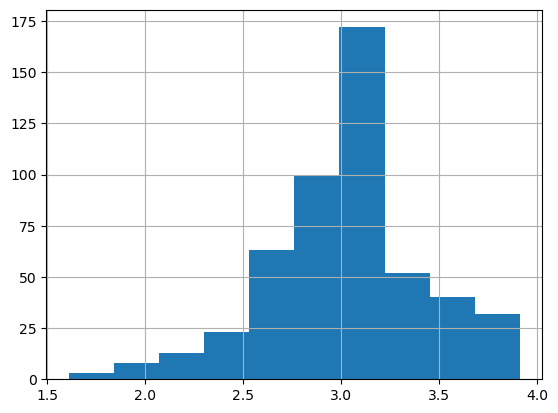

In [12]:
log_medv.hist()

In [13]:
# since graphically it is always not accurate to conclude if a distribution it Normal Distribution or not, we can use th p-value.
normaltest(log_medv)

NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))

This p-value is much closer to 0.05 but it is not completely normal.

### Square Root Transformation

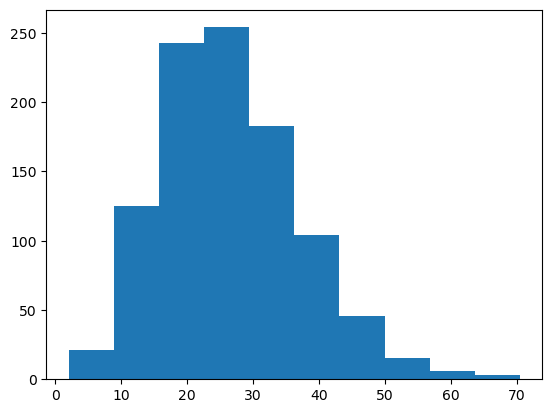

In [14]:
data = plot_square_normal_data()
# this data exhibits a slight right skew

(array([  3.,  14.,  47., 149., 236., 258., 182.,  83.,  20.,   8.]),
 array([1.42765184, 2.12442833, 2.82120482, 3.5179813 , 4.21475779,
        4.91153427, 5.60831076, 6.30508724, 7.00186373, 7.69864021,
        8.3954167 ]),
 <BarContainer object of 10 artists>)

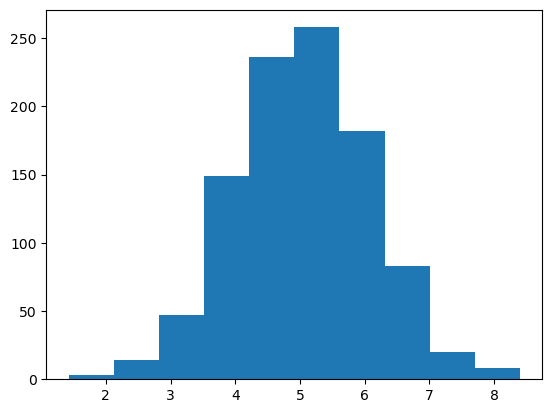

In [15]:
plt.hist(np.sqrt(data))

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

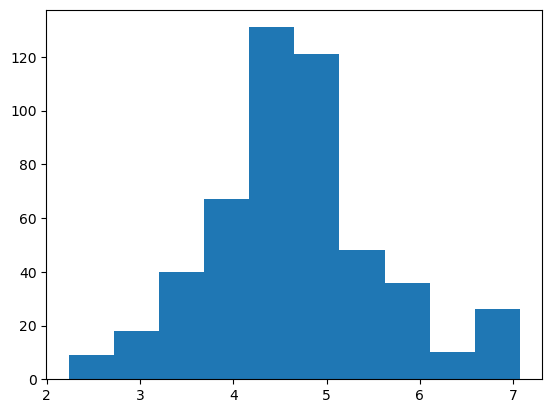

In [16]:
# Applying the transform to boston dataset
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [17]:
normaltest(sqrt_medv)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

Again the p-value is very small. So this is not very close to the Normal Distribution.

### Box Cox Transformation

This transform tries to get the distribution as close to Normal as possible.

In [18]:
from scipy.stats import boxcox

In [19]:
bc_data = boxcox(boston_data.MEDV)
# this object returns an array and a co-effecient

In [20]:
boxcox_medv = bc_data[0]
lam = bc_data[1]

<Axes: >

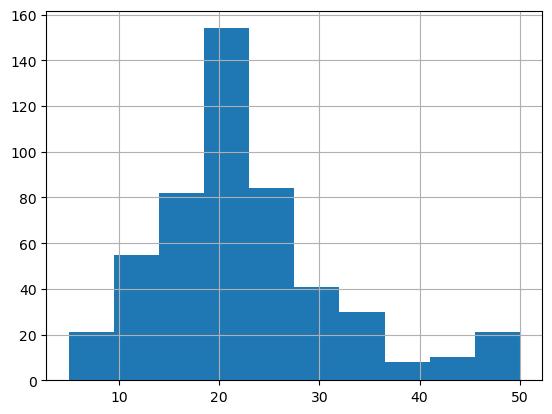

In [21]:
# real data
boston_data.MEDV.hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564957, 2.34873723, 2.7718249 , 3.19491257, 3.61800024,
        4.0410879 , 4.46417557, 4.88726324, 5.31035091, 5.73343858,
        6.15652624]),
 <BarContainer object of 10 artists>)

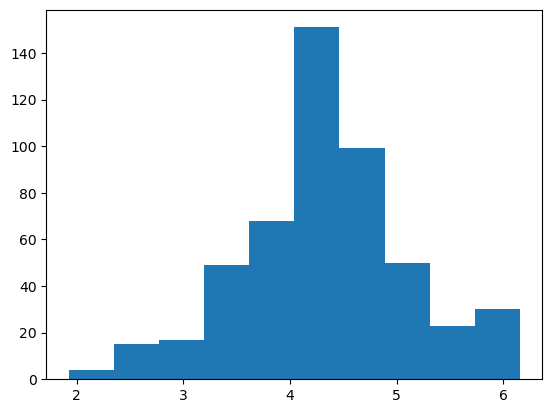

In [22]:
plt.hist(boxcox_medv)

In [23]:
normaltest(boxcox_medv)
# this has a very significant p-value
# let's test regression on this data

NormaltestResult(statistic=np.float64(4.513528737272365), pvalue=np.float64(0.10468867128449004))

## Testing Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [25]:
lr = LinearRegression()

In [26]:
# define input and output variables
y_col = "MEDV"

x = boston_data.drop(columns=y_col, axis=1)
y = boston_data[y_col]

In [27]:
# create polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(x)

In [28]:
# split data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

In [29]:
s = StandardScaler()
x_train_s = s.fit_transform(x_train)

In [30]:
# applying the boxcox transform to the y_train

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [31]:
# Now we perform the Lineare Regression Fitting
lr.fit(x_train_s, y_train_bc)

# for testing the data we need to scale the test set as well.
x_test_s = s.fit_transform(x_test)

# now predict using the test set
y_pred = lr.predict(x_test_s)

Now, how to we interpret these results. The results are according to a boxcox transformed y_train which is now fit using Linear Regression.
Now we can use Inverse Box Cox Transform to better interpret the y_pred.

We need to input y_pred and lambda we found to use Inverse BoxCox.

In [32]:
from scipy.special import inv_boxcox

In [33]:
# Trying Inverse BoxCOx with the data saved in boxcox_medv
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [34]:
# the above should be save as the original boston_data.MEDV
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [35]:
# inverse boxcox the y_pred and test r2_score
y_pred_inv_bc = inv_boxcox(y_pred, lam2)

r2_score(y_pred_inv_bc, y_test)

0.8256803385795184

We found that we have an accuracy of 82%

### What if we had not applied BoxCox Transform??

In [36]:
lr2 = LinearRegression()

lr2.fit(x_train_s, y_train)
y_pred2 = lr2.predict(x_test_s)
r2_score(y_pred2, y_test)

0.8001111380647437

We notice that the R2_score is slightly lower for unscaled data.